In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings 

warnings.simplefilter(action='ignore')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
test_df = pd.read_csv(r'test.csv')
test_df.shape

(715, 116)

In [5]:
train_df = pd.read_csv(r'train.csv')
train_df.shape

(2838, 116)

In [6]:
train_df.head()

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  lex_liwc_WC  \
0         0.8        1521614353             5    1.806818          116   
1         1.0        1527009817             4    9.429737          109   
2         0.8        1535935605             2    7.769821          167   
3         0.6        1516429555             0    2.667798          273   
4         0.8        1539809005            24    7.554238           89   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0              72.64           15.04               89.26           1.00   
1              79.08           76.85               56.75          98.18   
2              33.80           76.38               86.24          25.77   
3               2.98           15.25               95.42          79.26   
4              32.22           28.71               84.01           1.00   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0         29.00            12.93         87.07              56.03   
1         27.25            21.10         87.16              48.62   
2         33.40            17.37         91.02              61.68   
3         54.60             8.06         98.90              65.57   
4         17.80            31.46         88.76              52.81   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             16.38           12.07        9.48         0.00          0.86   
1             11.93            7.34        1.83         2.75          2.75   
2             25.15           16.17        8.98         1.80          1.80   
3             30.40           23.44       16.12         0.37          0.37   
4             15.73           11.24        7.87         0.00          0.00   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0            1.72            0.0            4.31              3.45   
1            0.00            0.0            4.59              8.26   
2            2.99            0.6            8.98              5.39   
3            6.59            0.0            6.96              3.30   
4            3.37            0.0            4.49              4.49   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0          19.83              7.76             5.17           4.31   
1          13.76              6.42             3.67           8.26   
2          12.57             10.18             1.80           5.99   
3           9.16              8.79             6.59           9.89   
4           8.99             13.48             4.49           4.49   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             1.72          16.38          6.03              3.45   
1             0.92          15.60          2.75              0.92   
2             1.20          20.96          1.20              0.60   
3             3.66          20.88          3.66              1.83   
4             2.25          13.48          4.49              2.25   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               0.86             1.72            1.72             8.62   
1               0.92             2.75            0.92             5.50   
2               0.60             1.20            1.80

In [7]:
train_data = train_df.copy()

In [8]:
train_data.isna().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [9]:
train_data['label'].value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

In [10]:
label_1_para = str.lower(''.join(train_data[train_data['label'] == 1]['text']))
label_1_para[:1000]

'he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi\'re a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f\'n worried about my heart. i do happen to have a physical in 48 hours.my mom then hit me with the newspaper and it shocked me that she would do this, she knows i don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. do i send out this vibe asking for it from the universe? then yesterday i decided to take my friend to go help another "friend" move to a new place. while we were driving the friend we are moving strikes me on my shoulder. and i address it im

In [11]:
label_0_para = str.lower(''.join(train_data[train_data['label'] == 0]['text']))
label_0_para[:1000]

"hey there r/assistance, not sure if this is the right place to post this.. but here goes =) i'm currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. we're looking for current undergrad/grad stem students so if you're a stem student or know stem students, i would greatly appreciate if you can help take or pass along this short survey. as a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 amazon gcs.it was a big company so luckily i didn't have to see him all the time, but when i did, he again acted as though i didn't exist. i tried to talk to him and update him on the pregnancy, and ask him to be involved for our child's sake, and he literally stared right through me without saying a word. 3 months after our daughter was born, i texted him and told him he was missing out on the most amazing person in t

In [12]:
from wordcloud import WordCloud, STOPWORDS

In [13]:
stopwords = set(STOPWORDS)

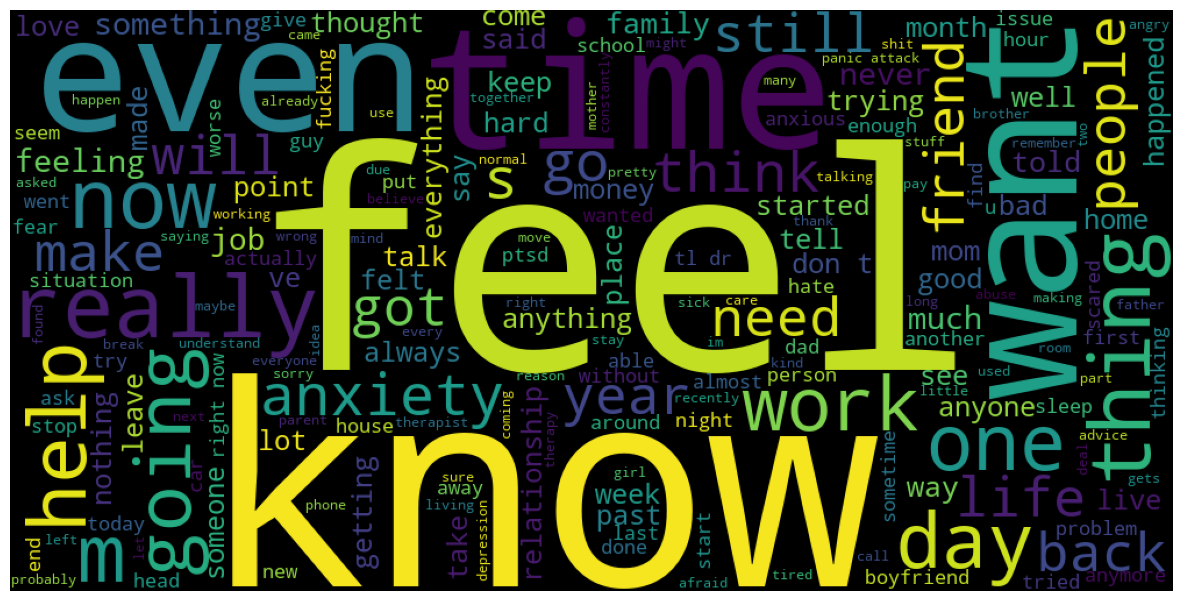

In [14]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_1_para)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

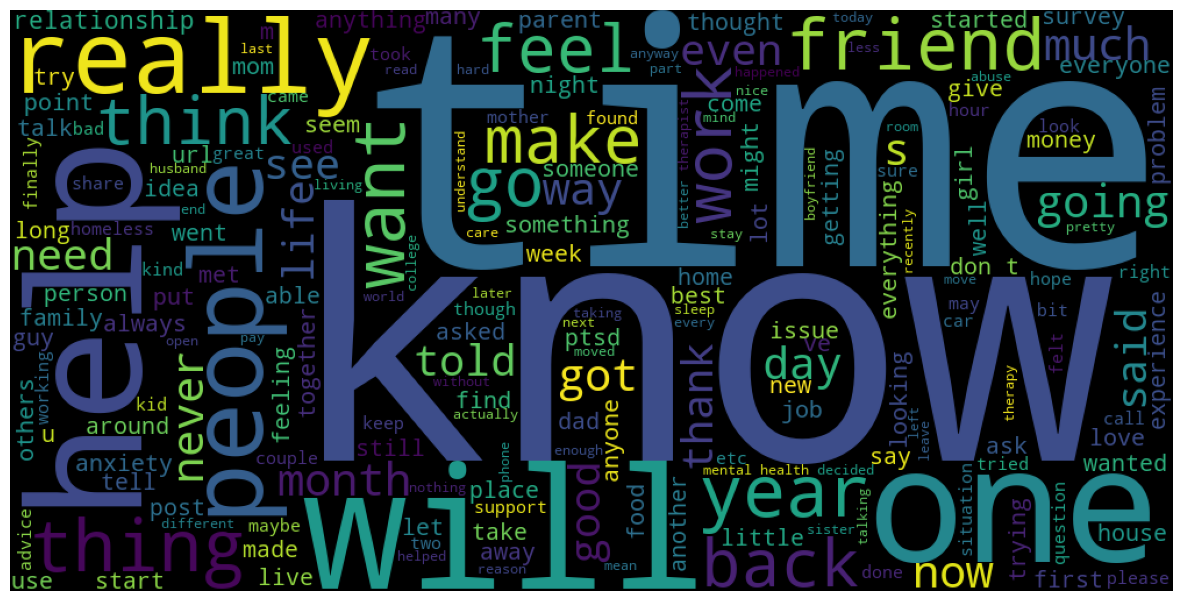

In [15]:
wordcloud1 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(label_0_para)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [16]:
sentiment_pos = str.lower(''.join(train_df[train_df['sentiment'] > 0]['text']))
sentiment_pos[:1000]

'hey there r/assistance, not sure if this is the right place to post this.. but here goes =) i\'m currently a student intern at sandia national labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. we\'re looking for current undergrad/grad stem students so if you\'re a stem student or know stem students, i would greatly appreciate if you can help take or pass along this short survey. as a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 amazon gcs.my mom then hit me with the newspaper and it shocked me that she would do this, she knows i don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. do i send out this vibe asking for it from the universe? then yesterday i decided to take my friend to go help another "friend" move to a new place. while we were driving the friend we are moving strikes me on my shoulder. a

In [17]:
sentiment_neg = str.lower(''.join(train_df[train_df['sentiment'] < 0]['text']))
sentiment_neg[:1000]

'he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi\'re a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f\'n worried about my heart. i do happen to have a physical in 48 hours.october is domestic violence awareness month and i am a domestic violence survivor who is still struggling, even after over four years. lately i have been feeling very angry. angry that my abusive ex received no real consequences for his actions. this man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. i was granted a restraining order against him (and it was renewed a year later) b

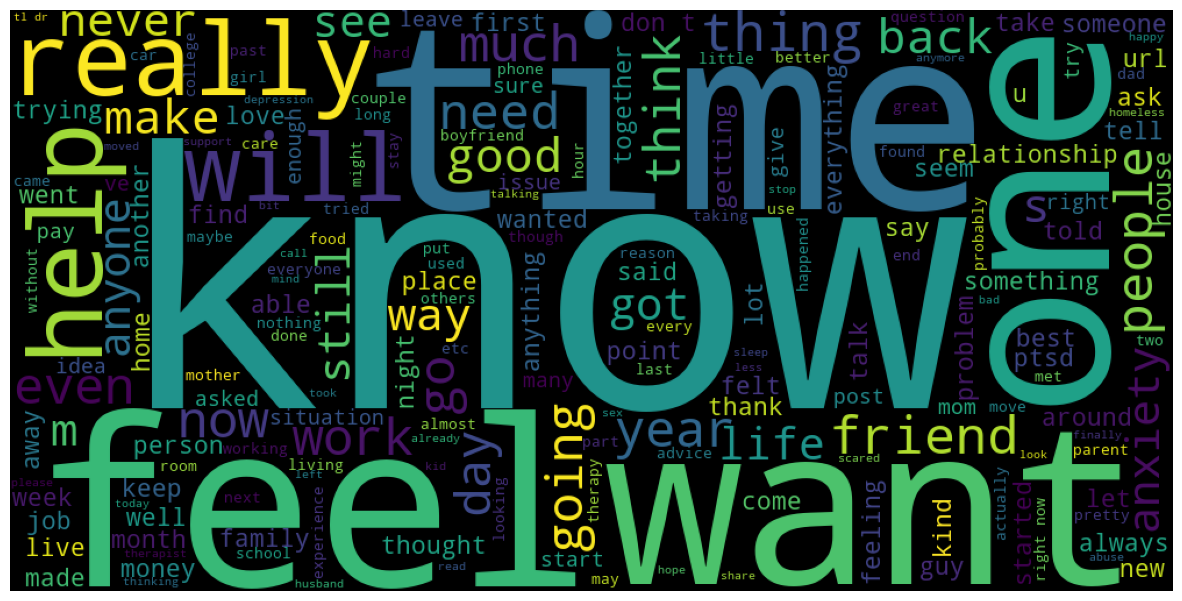

In [18]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(sentiment_pos)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

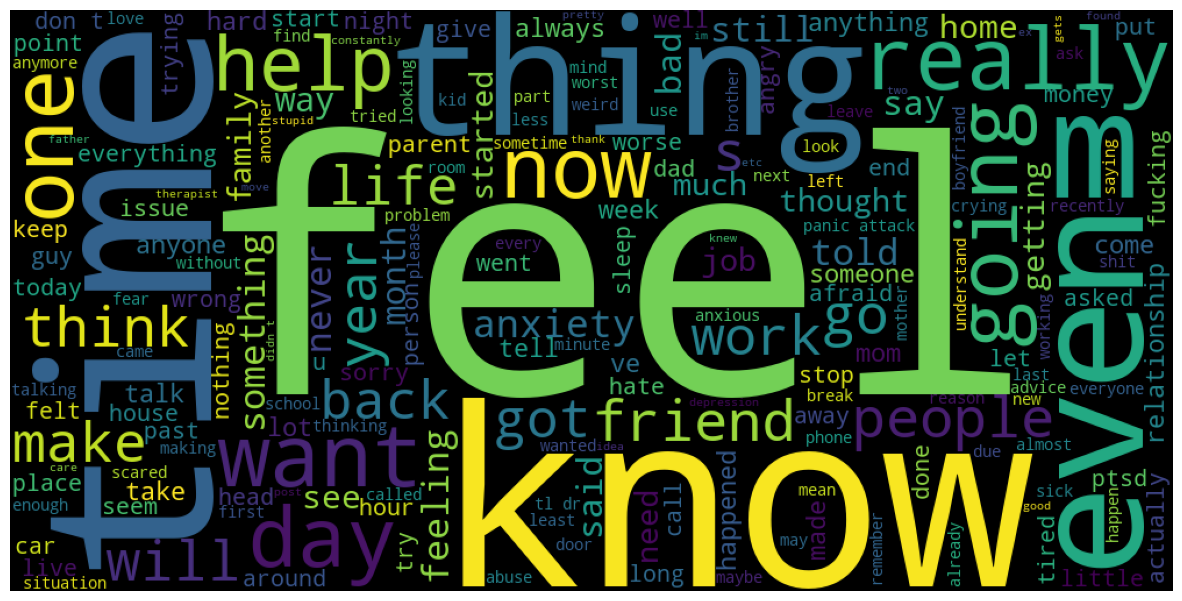

In [19]:
wordcloud3 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(sentiment_neg)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

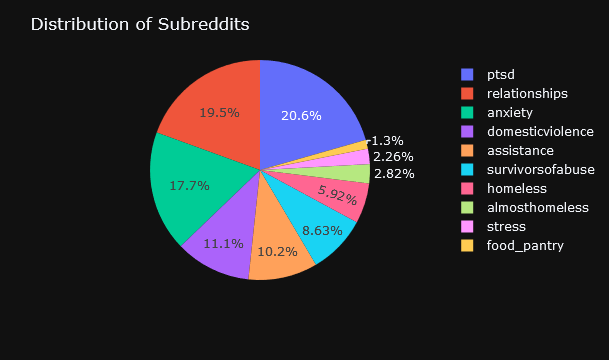

In [20]:
values = train_df['subreddit'].value_counts()
labels = train_df['subreddit'].value_counts().index
train_df['count'] = train_df.groupby('subreddit')['subreddit'].transform('count')

fig = px.pie(train_df, names=labels, values=values)
fig.update_layout(title='Distribution of Subreddits', template='plotly_dark')
fig.update_traces(hovertemplate='%{label}: %{value}')
fig.show()

In [21]:
test_df.head(1)

id      subreddit post_id sentence_range  \
0  896  relationships  7nu7as       [50, 55]   

                                                text  label  confidence  \
0  Its like that, if you want or not.“ ME: I have...      0         0.8   

   social_timestamp  social_karma  syntax_ari  lex_liwc_WC  lex_liwc_Analytic  \
0      1.514981e+09            22   -1.238793           55               2.82   

   lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  lex_liwc_WPS  \
0           57.22               55.41           5.95          11.0   

   lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  lex_liwc_pronoun  \
0             7.27         94.55              67.27             29.09   

   lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  lex_liwc_shehe  \
0           18.18        5.45          0.0          9.09            3.64   

   lex_liwc_they  lex_liwc_ipron  lex_liwc_article  lex_liwc_prep  \
0            0.0           10.91               0.0          12.73   

   lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  lex_liwc_negate  \
0              7.27             1.82          14.55             7.27   

   lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  lex_liwc_interrog  \
0          18.18          1.82              3.64               1.82   

   lex_liwc_number  lex_liwc_quant  lex_liwc_affect  lex_liwc_posemo  \
0             5.45             0.0             1.82              0.0   

   lex_liwc_negemo  lex_liwc_anx  lex_liwc_anger  lex_liwc_sad  \
0             1.82           0.0             0.0           0.0   

   lex_liwc_social  lex_liwc_family  lex_liwc_friend  lex_liwc_female  \
0             20.0              0.0             1.82              0.0   

   lex_liwc_male  lex_liwc_cogproc  lex_liwc_insight  lex_liwc_cause  \
0           3.64              20.0               0.0             0.0   

   lex_liwc_discrep  lex_liwc_tentat  lex_liwc_certain  lex_liwc_differ  \
0              7.27             7.27               0.0            14.55   

   lex_liwc_percept  lex_liwc_see  lex_liwc_hear  lex_liwc_feel  lex_liwc_bio  \
0               0.0           0.0            0.0            0.0           0.0   

   lex_liwc_body  lex_liwc_health  lex_liwc_sexual  lex_liwc_ingest  \
0            0.0              0.0              0.0              0.0   

   lex_liwc_drives  lex_liwc_affiliation  lex_liwc_achieve  lex_liwc_power  \
0             7.27                  3.64               0.0            1.82   

   lex_liwc_reward  lex_liwc_risk  lex_liwc_focuspast  lex_liwc_focuspresent  \
0             1.82           1.82                5.45                  10.91   

   lex_liwc_focusfuture  lex_liwc_relativ  lex_liwc_motion  lex_liwc_space  \
0                  3.64             12.73              0.0            1.82   

   lex_liwc_time  lex_liwc_work  lex_liwc_leisure  lex_liwc_home  \
0          10.91            0.0               0.0            0.0   

   lex_liwc_money  lex_liwc_relig  lex_liwc_death  lex_liwc_informal  \
0             0.0             0.0             0.0                0.0   

   lex_liwc_swear  lex_liwc_netspeak  lex_liwc_assent  lex_liwc_nonflu  \
0             0.0                0.0              0.0              0.0   

   lex_liwc_filler  lex_liwc_AllPunc  lex_liwc_Period  lex_liwc_Comma  \
0              0.0             23.64            12.73            5.45   

   lex_liwc_Colon  lex_liwc_SemiC  lex_liwc_QMark  lex_liwc_Exclam  \
0            1.82             0.0             0.0              0.0   

   lex_liwc_Dash  lex_liwc_Quote  lex_liwc_Apostro  lex_liwc_Parenth  \
0            0.0            1.82              1.82               0.0   

   lex_liwc_OtherP  lex_dal_max_pleasantness  lex_dal_max_activation  \
0              0.0                    2.7143                  2.8889   

   lex_dal_max_imagery  lex_dal_min_pleasantness  lex_dal_min_activation  \
0                  2.6                       1.0                     1.2   

   lex_dal_min_imagery  lex_dal_avg_activation  lex_dal_avg_i

In [22]:
test_df['text'][0]

'Its like that, if you want or not.“ ME: I have no problem, if it takes longer. But you asked my friend for help and let him wait for one hour and then you haven’t prepared anything. Thats not what you asked for. Instead of 3 hours, he helped you for 10 hours till 5am...'

In [23]:
train_df.head(1)

subreddit post_id sentence_range  \
0      ptsd  8601tu       (15, 20)   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   

   confidence  social_timestamp  social_karma  syntax_ari  lex_liwc_WC  \
0         0.8        1521614353             5    1.806818          116   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0              72.64           15.04               89.26            1.0   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0          29.0            12.93         87.07              56.03   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             16.38           12.07        9.48          0.0          0.86   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0            1.72            0.0            4.31              3.45   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0          19.83              7.76             5.17           4.31   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             1.72          16.38          6.03              3.45   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               0.86             1.72            1.72             8.62   

   lex_liwc_posemo  lex_liwc_negemo  lex_liwc_anx  lex_liwc_anger  \
0             1.72              6.9          0.86            2.59   

   lex_liwc_sad  lex_liwc_social  lex_liwc_family  lex_liwc_friend  \
0          3.45             3.45              0.0              0.0   

   lex_liwc_female  lex_liwc_male  lex_liwc_cogproc  lex_liwc_insight  \
0              0.0           1.72             11.21              3.45   

   lex_liwc_cause  lex_liwc_discrep  lex_liwc_tentat  lex_liwc_certain  \
0            0.86              2.59             5.17               0.0   

   lex_liwc_differ  lex_liwc_percept  lex_liwc_see  lex_liwc_hear  \
0             2.59              6.03          1.72           1.72   

   lex_liwc_feel  lex_liwc_bio  lex_liwc_body  lex_liwc_health  \
0           1.72          2.59           0.86             1.72   

   lex_liwc_sexual  lex_liwc_ingest  lex_liwc_drives  lex_liwc_affiliation  \
0              0.0              0.0             8.62                   0.0   

   lex_liwc_achieve  lex_liwc_power  lex_liwc_reward  lex_liwc_risk  \
0              1.72            4.31             0.86           2.59   

   lex_liwc_focuspast  lex_liwc_focuspresent  lex_liwc_focusfuture  \
0                4.31                  11.21                  0.86   

   lex_liwc_relativ  lex_liwc_motion  lex_liwc_space  lex_liwc_time  \
0             17.24             0.86           10.34           6.03   

   lex_liwc_work  lex_liwc_leisure  lex_liwc_home  lex_liwc_money  \
0           0.86               0.0            0.0             0.0   

   lex_liwc_relig  lex_liwc_death  lex_liwc_informal  lex_liwc_swear  \
0            2.59             0.0               0.86            0.86   

   lex_liwc_netspeak  lex_liwc_assent  lex_liwc_nonflu  lex_liwc_filler  \
0                0.0              0.0              0.0              0.0   

   lex_liwc_AllPunc  lex_liwc_Period  lex_liwc_Comma  lex_liwc_Colon  \
0             21.55             9.48            3.45            0.86   

   lex_liwc_SemiC  lex_liwc_QMark  lex_liwc_Exclam  lex_liwc_Dash  \
0            0.86             0.0              0.0            0.0   

   lex_liwc_Quote  lex_liwc_Apostro  lex_liwc_Parenth  lex_liwc_OtherP  \
0            5.17              1.72               0.0              0.0   

   lex_dal_max_pleasantness  lex_dal_max_activation  lex_dal_max_imagery  \
0                    2.8571                   2.625                  3.0   

   lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                       1.0                   1.125                  1.0   

   lex_dal_a

In [24]:
train_df.drop(['text', 'post_id' , 'sentence_range', 'id', 'social_timestamp'], axis=1, inplace=True)

In [25]:
train_df.head(1)

subreddit  label  confidence  social_karma  syntax_ari  lex_liwc_WC  \
0      ptsd      1         0.8             5    1.806818          116   

   lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0              72.64           15.04               89.26            1.0   

   lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0          29.0            12.93         87.07              56.03   

   lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0             16.38           12.07        9.48          0.0          0.86   

   lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0            1.72            0.0            4.31              3.45   

   lex_liwc_prep  lex_liwc_auxverb  lex_liwc_adverb  lex_liwc_conj  \
0          19.83              7.76             5.17           4.31   

   lex_liwc_negate  lex_liwc_verb  lex_liwc_adj  lex_liwc_compare  \
0             1.72          16.38          6.03              3.45   

   lex_liwc_interrog  lex_liwc_number  lex_liwc_quant  lex_liwc_affect  \
0               0.86             1.72            1.72             8.62   

   lex_liwc_posemo  lex_liwc_negemo  lex_liwc_anx  lex_liwc_anger  \
0             1.72              6.9          0.86            2.59   

   lex_liwc_sad  lex_liwc_social  lex_liwc_family  lex_liwc_friend  \
0          3.45             3.45              0.0              0.0   

   lex_liwc_female  lex_liwc_male  lex_liwc_cogproc  lex_liwc_insight  \
0              0.0           1.72             11.21              3.45   

   lex_liwc_cause  lex_liwc_discrep  lex_liwc_tentat  lex_liwc_certain  \
0            0.86              2.59             5.17               0.0   

   lex_liwc_differ  lex_liwc_percept  lex_liwc_see  lex_liwc_hear  \
0             2.59              6.03          1.72           1.72   

   lex_liwc_feel  lex_liwc_bio  lex_liwc_body  lex_liwc_health  \
0           1.72          2.59           0.86             1.72   

   lex_liwc_sexual  lex_liwc_ingest  lex_liwc_drives  lex_liwc_affiliation  \
0              0.0              0.0             8.62                   0.0   

   lex_liwc_achieve  lex_liwc_power  lex_liwc_reward  lex_liwc_risk  \
0              1.72            4.31             0.86           2.59   

   lex_liwc_focuspast  lex_liwc_focuspresent  lex_liwc_focusfuture  \
0                4.31                  11.21                  0.86   

   lex_liwc_relativ  lex_liwc_motion  lex_liwc_space  lex_liwc_time  \
0             17.24             0.86           10.34           6.03   

   lex_liwc_work  lex_liwc_leisure  lex_liwc_home  lex_liwc_money  \
0           0.86               0.0            0.0             0.0   

   lex_liwc_relig  lex_liwc_death  lex_liwc_informal  lex_liwc_swear  \
0            2.59             0.0               0.86            0.86   

   lex_liwc_netspeak  lex_liwc_assent  lex_liwc_nonflu  lex_liwc_filler  \
0                0.0              0.0              0.0              0.0   

   lex_liwc_AllPunc  lex_liwc_Period  lex_liwc_Comma  lex_liwc_Colon  \
0             21.55             9.48            3.45            0.86   

   lex_liwc_SemiC  lex_liwc_QMark  lex_liwc_Exclam  lex_liwc_Dash  \
0            0.86             0.0              0.0            0.0   

   lex_liwc_Quote  lex_liwc_Apostro  lex_liwc_Parenth  lex_liwc_OtherP  \
0            5.17              1.72               0.0              0.0   

   lex_dal_max_pleasantness  lex_dal_max_activation  lex_dal_max_imagery  \
0                    2.8571                   2.625                  3.0   

   lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                       1.0                   1.125                  1.0   

   lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  \
0                    1.77              1.52211                   1.89556   

   social_upvote_ratio  social_num_comments  syntax_fk_grade  sentiment  count 

In [26]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.feature_selection import SelectKBest, chi2, RFE, VarianceThreshold, mutual_info_classif, SelectKBest

In [27]:
minmax = MinMaxScaler()
stdscaler = StandardScaler()
norm = Normalizer()

In [28]:
label_enc = LabelEncoder()
train_df['subreddit'] = label_enc.fit_transform(train_df['subreddit'])

In [29]:
X = train_df.drop('label', axis=1)
y = train_df['label']

In [30]:
num_feats = 30
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
X[chi_feature]

lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0                 72.64           15.04               89.26           1.00   
1                 79.08           76.85               56.75          98.18   
2                 33.80           76.38               86.24          25.77   
3                  2.98           15.25               95.42          79.26   
4                 32.22           28.71               84.01           1.00   
...                 ...             ...                 ...            ...   
2833              19.41           99.00               37.57          99.00   
2834              40.97            4.45               98.01           1.00   
2835              79.52           97.34                2.27          80.01   
2836              29.74           61.58               21.06          25.77   
2837               1.00           29.92               28.23           1.00   

      lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  lex_liwc_article  \
0              12.07        9.48         0.00          0.86              3.45   
1               7.34        1.83         2.75          2.75              8.26   
2              16.17        8.98         1.80          1.80              5.39   
3              23.44       16.12         0.37          0.37              3.30   
4              11.24        7.87         0.00          0.00              4.49   
...              ...         ...          ...           ...               ...   
2833           20.22        5.62         3.37          6.74              3.37   
2834           11.11       11.11         0.00          0.00              5.19   
2835            8.21        0.00         4.48          3.73              5.22   
2836           11.76        4.41         0.00          1.47              5.88   
2837           22.81       14.04         0.00          0.00              1.75   

      lex_liwc_adverb  lex_liwc_negate  lex_liwc_posemo  lex_liwc_negemo  \
0                5.17             1.72             1.72             6.90   
1                3.67             0.92             5.50             0.00   
2                1.80             1.20             1.20             1.20   
3                6.59             3.66             5.86             2.93   
4                4.49             2.25             0.00             7.87   
...               ...              ...              ...              ...   
2833             2.25             1.12             7.87             1.12   
2834             5.93             2.96             1.48             5.93   
2835             4.48             0.75             3.73             0.75   
2836             2.94             1.47             5.88             5.88   
2837             7.02             5.26             1.75             7.02   

      lex_liwc_anx  lex_liwc_anger  lex_liwc_sad  lex_liwc_social  \
0             0.86            2.59          3.45             3.45   
1             0.00            0.00          0.00            11.01   
2             0.00            0.00          0.00            15.57   
3             0.00            0.37          0.73            13.55   
4             1.12            4.49          0.00             8.99   
...            ...             ...           ...              ...   
2833          0.00            0.00          0.00            23.60   
2834          4.44            0.00          0.74             0.00   
2835          0.00            0.00          0.00            14.18   
2836          1.47            1.47          0.00            14.71   
2837          1.75            0.00          0.00            21.05   

      lex_liwc_female  lex_liwc_feel  lex_liwc_health  lex_liwc_sexual  \
0                0.00           1.72             1.72             0.00   
1                0.00           0.00             0.00             0.00   
2                1.80           0.00             0.00             0.00   
3                0.37           5.49             0.00     

In [31]:
var_thres = VarianceThreshold(0)
var_thres.fit(X_norm)

VarianceThreshold(threshold=0)

In [32]:
cols_selected = X.loc[:, var_thres.get_support()].columns.tolist()
# cols_selected
X[cols_selected]

subreddit  confidence  social_karma  syntax_ari  lex_liwc_WC  \
0             6    0.800000             5    1.806818          116   
1             2    1.000000             4    9.429737          109   
2             6    0.800000             2    7.769821          167   
3             7    0.600000             0    2.667798          273   
4             9    0.800000            24    7.554238           89   
...         ...         ...           ...         ...          ...   
2833          7    1.000000            13   -1.369333           89   
2834          6    1.000000            33    9.425478          135   
2835          1    1.000000             2   11.060675          134   
2836          0    0.571429             4    2.421912           68   
2837          6    0.571429             2    0.835254           57   

      lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  lex_liwc_Tone  \
0                 72.64           15.04               89.26           1.00   
1                 79.08           76.85               56.75          98.18   
2                 33.80           76.38               86.24          25.77   
3                  2.98           15.25               95.42          79.26   
4                 32.22           28.71               84.01           1.00   
...                 ...             ...                 ...            ...   
2833              19.41           99.00               37.57          99.00   
2834              40.97            4.45               98.01           1.00   
2835              79.52           97.34                2.27          80.01   
2836              29.74           61.58               21.06          25.77   
2837               1.00           29.92               28.23           1.00   

      lex_liwc_WPS  lex_liwc_Sixltr  lex_liwc_Dic  lex_liwc_function  \
0            29.00            12.93         87.07              56.03   
1            27.25            21.10         87.16              48.62   
2            33.40            17.37         91.02              61.68   
3            54.60             8.06         98.90              65.57   
4            17.80            31.46         88.76              52.81   
...            ...              ...           ...                ...   
2833         17.80             5.62         97.75              57.30   
2834         27.00            17.78         96.30              58.52   
2835         22.33            25.37         84.33              48.51   
2836         13.60            16.18         92.65              57.35   
2837         14.25             7.02         98.25              68.42   

      lex_liwc_pronoun  lex_liwc_ppron  lex_liwc_i  lex_liwc_we  lex_liwc_you  \
0                16.38           12.07        9.48         0.00          0.86   
1                11.93            7.34        1.83         2.75          2.75   
2                25.15           16.17        8.98         1.80          1.80   
3                30.40           23.44       16.12         0.37          0.37   
4                15.73           11.24        7.87         0.00          0.00   
...                ...             ...         ...          ...           ...   
2833             25.84           20.22        5.62         3.37          6.74   
2834             16.30           11.11       11.11         0.00          0.00   
2835             12.69            8.21        0.00         4.48          3.73   
2836             17.65           11.76        4.41         0.00          1.47   
2837             31.58           22.81       14.04         0.00          0.00   

      lex_liwc_shehe  lex_liwc_they  lex_liwc_ipron  lex_liwc_article  \
0               1.72           0.00            4.31              3.45   
1               0.00           0.00            4.59              8.26   
2               2.99           0.60            8.98              5.39   
3               6.59           0.00            6.96              3.30   
4               3.37     

In [33]:
def correlation(df, thres): #Dataset and threshold value
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > thres:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(X, 0.7)
len(corr_features)

11

In [35]:
corr_features
# X[corr_features]
X[list(corr_features)]

lex_liwc_ppron  lex_liwc_posemo  lex_liwc_pronoun  lex_liwc_negemo  \
0              12.07             1.72             16.38             6.90   
1               7.34             5.50             11.93             0.00   
2              16.17             1.20             25.15             1.20   
3              23.44             5.86             30.40             2.93   
4              11.24             0.00             15.73             7.87   
...              ...              ...               ...              ...   
2833           20.22             7.87             25.84             1.12   
2834           11.11             1.48             16.30             5.93   
2835            8.21             3.73             12.69             0.75   
2836           11.76             5.88             17.65             5.88   
2837           22.81             1.75             31.58             7.02   

      syntax_fk_grade  lex_liwc_OtherP  lex_liwc_i  social_num_comments  \
0            3.253573             0.00        9.48                    1   
1            8.828316             3.67        1.83                    2   
2            7.841667             0.00        8.98                    0   
3            4.104027             0.00       16.12                    5   
4            7.910952             0.00        7.87                    1   
...               ...              ...         ...                  ...   
2833         0.254444             6.74        5.62                   16   
2834         8.640664             0.00       11.11                    6   
2835         9.951524             0.75        0.00                    1   
2836         4.036765             0.00        4.41                    7   
2837         2.412000             0.00       14.04                    2   

      lex_liwc_WPS  lex_liwc_time  lex_liwc_social  
0            29.00           6.03             3.45  
1            27.25           1.83            11.01  
2            33.40           5.39            15.57  
3            54.60           6.23            13.55  
4            17.80          10.11             8.99  
...            ...            ...              ...  
2833         17.80           7.87            23.60  
2834         27.00           8.15             0.00  
2835         22.33           2.99            14.18  
2836         13.60           2.94            14.71  
2837         14.25           5.26            21.05  

[2838 rows x 11 columns]

In [36]:
mutual_cls = mutual_info_classif(X, y)


In [37]:
select_20_cols = SelectKBest(mutual_info_classif, k=20)
select_20_cols.fit(X, y)
mutual_cols = X.columns[select_20_cols.get_support()]
mutual_cols

Index(['lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic',
       'lex_liwc_Tone', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_ppron',
       'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_verb', 'lex_liwc_posemo',
       'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_social',
       'lex_liwc_Apostro', 'lex_dal_min_pleasantness',
       'lex_dal_avg_activation', 'sentiment', 'count'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sfrom xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

<Axes: xlabel='label'>

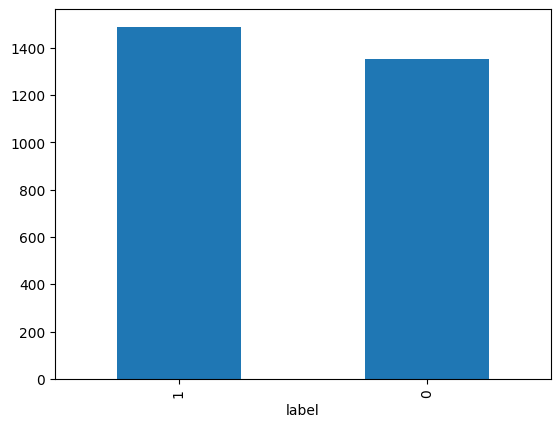

In [39]:
y.value_counts().plot(kind='bar')

In [40]:
X_chi = X[chi_feature]
ac=[]

from lib.utils import *


X,y=extract_feature(X_chi)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
import tensorflow as tf
model=tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=4))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=30)
ac.append(accuracy_score(model,y_test,sample_weight=0.4)*100)

 

ModuleNotFoundError: No module named 'lib.utils'

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  


  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)


  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
def GoogLeNet():

  input_layer = Input(shape = (224, 224, 3))

  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)


  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)


  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)


  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)


  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)


  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)


  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  
  X1 = Dropout(0.7)(X1)
  

  
  
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

 
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
 
  X2 = Dropout(0.7)(X2)
 
  
  
 
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  
  X = Dropout(0.4)(X)

 
 
  
  model = Sequential()
  model.add(Dense(20, input_dim=16, activation='relu'))
  model.add(Dense(10,  activation='tanh'))
  model.add(Dense(1024, activation='relu'))

  model.add(BatchNormalization())
 
  model.add(Dense(1, activation='sigmoid'))

  return model
mod=GoogLeNet()
mod.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
ac.append(accuracy_score(y_test,mod,sample_weight=0.2)*100)


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['InceptionNet','GoogleNet']
 
ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)